<a href="https://colab.research.google.com/github/Reventh-Sharma/Gas-Concentration-Prediction/blob/master/Neural_Decision_methane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import math
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/unanomalousfinal2.csv')
X1=dataset.iloc[:,:].values
X1=np.append(X1,[X1[-1,:]],axis=0)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ethylene_methane.csv')

In [ ]:
y = dataset.iloc[:, 1:3].values

In [ ]:
a=int(int(np.size(y,0)/10000)*1900)
y1=np.zeros((a,2))
for i in range(int(np.size(y,0)/10000)):
    y1[i*1900:(i+1)*1900,:]=y[i*10000+8000:(i+1)*10000-100,:]
del dataset,y

In [ ]:
X1 = (X1-X1.mean(axis=0))/X1.max(axis=0)
y1_mean = y1.mean(axis = 0)
y1_max=y1.max(axis=0)
y2 = (y1-y1_mean)/y1_max

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size = 0.25,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
max_depth=np.arange(1,77,5)
error_train_co=np.zeros(np.size(max_depth))
error_test_co=np.zeros(np.size(max_depth))
error_train_et=np.zeros(np.size(max_depth))
error_test_et=np.zeros(np.size(max_depth))

In [ ]:
m=0
for depth in max_depth:
    regr=DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=2)
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    for i in range(0,np.size(y_pred,0)):
        for j in range(0,np.size(y_pred,1)):
            if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
                y_pred[i,j]=-y1_mean[j]/y1_max[j]
    y_train_pred=regr.predict(X_train)
    error_train_co[m]=math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    error_test_co[m]=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
    error_train_et[m]=math.sqrt(mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    error_test_et[m]=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
    m=m+1

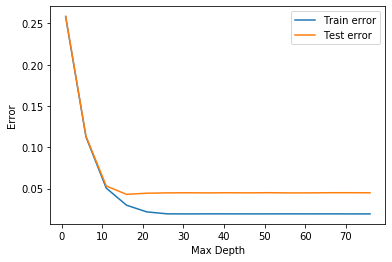

In [ ]:
plt.plot(max_depth, error_train_co, label='Train error')
plt.plot(max_depth, error_test_co, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

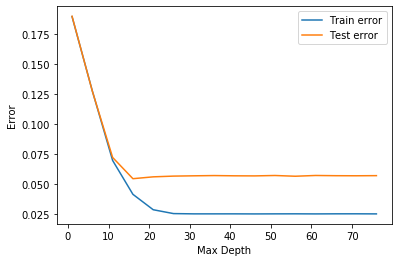

In [ ]:
plt.plot(max_depth, error_train_et, label='Train error')
plt.plot(max_depth, error_test_et, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
depth=56

In [ ]:
regr=DecisionTreeRegressor(max_depth=depth, min_samples_split=100, min_samples_leaf=20)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
for i in range(0,np.size(y_pred,0)):
    for j in range(0,np.size(y_pred,1)):
        if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
            y_pred[i,j]=-y1_mean[j]/y1_max[j]
error_test_co=(math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0])))
error_test_et=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
RMSE=np.array([error_test_co, error_test_et])*y1_max

In [ ]:
print("RMSE for CO prediction is",RMSE[0],"and Ethylene prediction is",RMSE[1],"respectively.")

RMSE for CO prediction is 12.470682111719917 and Ethylene prediction is 1.0751279293455944 respectively.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
max_depth=np.arange(1,52,5)
error_train_co=np.zeros(np.size(max_depth))
error_test_co=np.zeros(np.size(max_depth))
error_train_et=np.zeros(np.size(max_depth))
error_test_et=np.zeros(np.size(max_depth))

In [ ]:
m=0
for depth in max_depth:
    regr=RandomForestRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=2)
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    for i in range(0,np.size(y_pred,0)):
        for j in range(0,np.size(y_pred,1)):
            if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
                y_pred[i,j]=-y1_mean[j]/y1_max[j]
    y_train_pred=regr.predict(X_train)
    error_train_co[m]=math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    error_test_co[m]=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
    error_train_et[m]=math.sqrt(mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    error_test_et[m]=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
    m=m+1

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

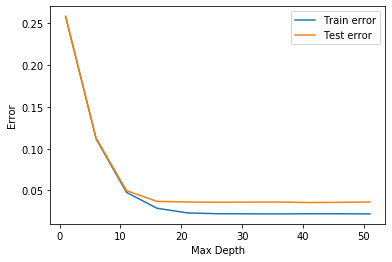

In [ ]:
plt.plot(max_depth, error_train_co, label='Train error')
plt.plot(max_depth, error_test_co, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

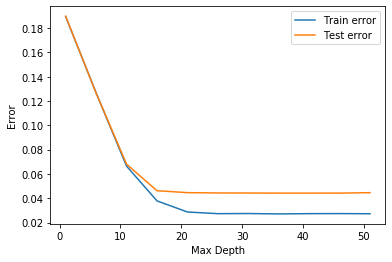

In [ ]:
plt.plot(max_depth, error_train_et, label='Train error')
plt.plot(max_depth, error_test_et, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
depth=40

In [ ]:
regr=RandomForestRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=2)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
for i in range(0,np.size(y_pred,0)):
    for j in range(0,np.size(y_pred,1)):
        if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
            y_pred[i,j]=-y1_mean[j]/y1_max[j]
error_test_co=(math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0])))
error_test_et=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
RMSE=np.array([error_test_co, error_test_et])*y1_max

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
print("RMSE for CO prediction is",RMSE[0],"and Ethylene prediction is",RMSE[1],"respectively.")

RMSE for CO prediction is 10.63529561669382 and Ethylene prediction is 0.892085008442184 respectively.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()
classifier.add(Dense(output_dim = 50, init = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=50, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=2, kernel_initializer="uniform")`
  


In [ ]:
count=np.arange(1,201,1)
error_train_co=np.zeros(np.size(count))
error_test_co=np.zeros(np.size(count))
error_train_et=np.zeros(np.size(count))
error_test_et=np.zeros(np.size(count))

In [ ]:
for index in count:
    classifier.fit(X_train, y_train, batch_size = 1900, nb_epoch = 5)
    y_pred = classifier.predict(X_test)
    for i in range(0,np.size(y_pred,0)):
        for j in range(0,np.size(y_pred,1)):
            if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
                y_pred[i,j]=-y1_mean[j]/y1_max[j]
    y_train_pred=classifier.predict(X_train)
    error_train_co[index-1]=math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    error_test_co[index-1]=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
    error_train_et[index-1]=math.sqrt(mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    error_test_et[index-1]=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Epoch 1/5





594225/594225 [==============================] - 6s 10us/step - loss: 0.0328 - acc: 0.6946
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0205 - acc: 0.7963
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0187 - acc: 0.8215
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0175 - acc: 0.8296
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0166 - acc: 0.8405
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0160 - acc: 0.8549

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0157 - acc: 0.8579
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0149 - acc: 0.8643
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0143 - acc: 0.8688
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0138 - acc: 0.8715
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0133 - acc: 0.8734
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0130 - acc: 0.8739

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0129 - acc: 0.8747
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0125 - acc: 0.8762
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0122 - acc: 0.8788
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0119 - acc: 0.8792
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0115 - acc: 0.8804
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0114 - acc: 0.8797

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0113 - acc: 0.8791
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0111 - acc: 0.8796
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0110 - acc: 0.8787
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0107 - acc: 0.8763
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0106 - acc: 0.8750
Epoch 1/5
 74100/594225 [==>...........................] - ETA: 1s - loss: 0.0106 - acc: 0.8753

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0104 - acc: 0.8726
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0103 - acc: 0.8711
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0101 - acc: 0.8698
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0100 - acc: 0.8698
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0098 - acc: 0.8676
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0099 - acc: 0.8677

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0098 - acc: 0.8692
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0097 - acc: 0.8687
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0095 - acc: 0.8697
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0094 - acc: 0.8721
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0093 - acc: 0.8724
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0090 - acc: 0.8721

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0092 - acc: 0.8694
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0092 - acc: 0.8710
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0092 - acc: 0.8701
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0091 - acc: 0.8709
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0090 - acc: 0.8722
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0088 - acc: 0.8676

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0089 - acc: 0.8727
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0089 - acc: 0.8721
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0088 - acc: 0.8743
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0087 - acc: 0.8750
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0087 - acc: 0.8730
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0088 - acc: 0.8657

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0087 - acc: 0.8717
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0086 - acc: 0.8745
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0086 - acc: 0.8727
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0086 - acc: 0.8748
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0085 - acc: 0.8770
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0084 - acc: 0.8799

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0085 - acc: 0.8757
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0085 - acc: 0.8764
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0084 - acc: 0.8788
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0084 - acc: 0.8766
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0084 - acc: 0.8772
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0086 - acc: 0.8721

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0083 - acc: 0.8781
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0083 - acc: 0.8781
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0083 - acc: 0.8804
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0083 - acc: 0.8778
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0083 - acc: 0.8799
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0082 - acc: 0.8810

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0082 - acc: 0.8828
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0082 - acc: 0.8823
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0082 - acc: 0.8794
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0081 - acc: 0.8805
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0082 - acc: 0.8817
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0082 - acc: 0.8844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0081 - acc: 0.8826
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0081 - acc: 0.8819
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0081 - acc: 0.8809
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0081 - acc: 0.8830
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0081 - acc: 0.8826
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0081 - acc: 0.8819

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0081 - acc: 0.8859
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0081 - acc: 0.8818
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0080 - acc: 0.8847
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0080 - acc: 0.8870
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0080 - acc: 0.8845
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0079 - acc: 0.8850

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0079 - acc: 0.8866
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0079 - acc: 0.8866
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0080 - acc: 0.8862
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0079 - acc: 0.8857
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0079 - acc: 0.8873
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0079 - acc: 0.8877

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0079 - acc: 0.8882
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0079 - acc: 0.8893
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0079 - acc: 0.8904
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0078 - acc: 0.8881
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0079 - acc: 0.8891
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0078 - acc: 0.8852

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0078 - acc: 0.8896
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0079 - acc: 0.8890
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0078 - acc: 0.8904
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0078 - acc: 0.8893
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0078 - acc: 0.8901
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0079 - acc: 0.8940

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0078 - acc: 0.8906
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0078 - acc: 0.8887
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0078 - acc: 0.8923
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0078 - acc: 0.8904
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0077 - acc: 0.8890
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0077 - acc: 0.8918

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0078 - acc: 0.8913
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0077 - acc: 0.8922
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0077 - acc: 0.8918
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0077 - acc: 0.8925
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0078 - acc: 0.8943
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0079 - acc: 0.8915

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0077 - acc: 0.8914
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0077 - acc: 0.8948
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0077 - acc: 0.8946
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0077 - acc: 0.8955
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0076 - acc: 0.8940
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0076 - acc: 0.8965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0076 - acc: 0.8955
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0077 - acc: 0.8926
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0076 - acc: 0.8929
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0076 - acc: 0.8944
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0076 - acc: 0.8949
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0077 - acc: 0.8937

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0076 - acc: 0.8955
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0076 - acc: 0.8948
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0076 - acc: 0.8938
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0076 - acc: 0.8969
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0076 - acc: 0.8938
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0074 - acc: 0.8965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0075 - acc: 0.8939
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0075 - acc: 0.8956
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0076 - acc: 0.8960
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0075 - acc: 0.8964
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0075 - acc: 0.8989
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0075 - acc: 0.8980

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0075 - acc: 0.8959
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0075 - acc: 0.8963
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0075 - acc: 0.8935
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0075 - acc: 0.8960
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8991
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0075 - acc: 0.8929

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0075 - acc: 0.8959
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8954
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0075 - acc: 0.8992
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8984
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0075 - acc: 0.8955
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0076 - acc: 0.9002

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8993
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8970
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8985
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0074 - acc: 0.8994
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0075 - acc: 0.8936
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0074 - acc: 0.8926

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8965
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0074 - acc: 0.8971
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8954
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8992
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8987
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0075 - acc: 0.8952

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8976
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.8996
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8980
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8970
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.8990
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0075 - acc: 0.8981

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0074 - acc: 0.8982
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8987
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.9004
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8990
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.8973
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.8999

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8975
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0074 - acc: 0.8992
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0074 - acc: 0.8969
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8995
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9019
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0073 - acc: 0.8992

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8984
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9011
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9014
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.9009
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9024
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0075 - acc: 0.8951

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0074 - acc: 0.9031
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.9010
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8988
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8995
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9024
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0073 - acc: 0.8988

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9018
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9036
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9043
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.8991
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9021
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0074 - acc: 0.9018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.9026
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.9033
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9054
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9019
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9023
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0073 - acc: 0.8977

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9034
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9042
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0073 - acc: 0.9049
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9025
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9031
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0074 - acc: 0.9002

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9028
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9037
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9025
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.8999
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9018
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.8992

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9021
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9020
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9049
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9052
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0073 - acc: 0.9043
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.8999

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9054
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9049
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9069
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9054
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9063
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0071 - acc: 0.9126

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9076
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9048
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0072 - acc: 0.9052
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9074
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9059
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0071 - acc: 0.9104

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9089
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9066
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9081
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0071 - acc: 0.9068
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9049
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0072 - acc: 0.9072

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9067
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9088
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9066
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0072 - acc: 0.9055
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9057
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.9147

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0071 - acc: 0.9068
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9039
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0072 - acc: 0.9091
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9076
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9071
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0071 - acc: 0.8987

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9058
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9070
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9054
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9097
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9080
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.9126

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0071 - acc: 0.9056
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9052
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0071 - acc: 0.9060
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9076
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0071 - acc: 0.9036
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0071 - acc: 0.8925

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9040
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9057
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0071 - acc: 0.9094
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0071 - acc: 0.9066
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9042
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9054

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9049
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9048
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9043
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9033
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9055
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9075

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9080
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9068
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9048
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9062
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9068
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.9049

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9064
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9073
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9052
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9087
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0071 - acc: 0.9050
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9078

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9071
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9058
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9078
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9062
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0070 - acc: 0.9078
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.9111

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0070 - acc: 0.9085
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9084
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9064
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9096
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9057
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.8962

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9080
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9073
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9069
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0070 - acc: 0.9086
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9061
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9047

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9073
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9079
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9069
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9094
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9084
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0072 - acc: 0.9049

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9061
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9099
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9074
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9068
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9068
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9114

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9100
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9075
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9057
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0070 - acc: 0.9085
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9102
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9110

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9069
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9080
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9082
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9081
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9104
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9119

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9087
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9066
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9100
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9097
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9119
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9076

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0070 - acc: 0.9098
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9105
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9078
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9084
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9116
Epoch 1/5
 57000/594225 [=>............................] - ETA: 1s - loss: 0.0069 - acc: 0.9091

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9095
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9103
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9100
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9116
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9125
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9152

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9118
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9098
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0070 - acc: 0.9084
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9090
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9111
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9102

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9096
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9098
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9109
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9109
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9109
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9163

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9118
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9107
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9099
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9090
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9101
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9138

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9103
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9110
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9127
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9130
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9100
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9115

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9114
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9094
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9117
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9099
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0070 - acc: 0.9105
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9119

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9125
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9097
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9093
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9106
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9112
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9118

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9103
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9117
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9108
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9102
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9091
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9098

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9118
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9103
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9119
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9113
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9127
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9074

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9107
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9128
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9125
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9116
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9131
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9101

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9100
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9102
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9121
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9125
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9114
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9171

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9117
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9109
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9114
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9116
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0069 - acc: 0.9110
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9145

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9126
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9121
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9113
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9122
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9130
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9030

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9111
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9106
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9115
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9143
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9122
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9158

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9128
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9152
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9119
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0069 - acc: 0.9114
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9122
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9178

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9136
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9134
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9116
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9112
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9136
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9169

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9139
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9136
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9135
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0069 - acc: 0.9109
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9138
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9129
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9114
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9141
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9132
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9140
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9154

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9120
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9115
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9113
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9137
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9133
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9085

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9111
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9135
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9118
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9133
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9127
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9099

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9130
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9119
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9123
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9138
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9129
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9142

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9129
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9125
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9126
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9155
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9120
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9146

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9119
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9138
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9132
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9138
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9140
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9145

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9129
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9140
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9110
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9121
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9136
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9162

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9142
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9122
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9123
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9130
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9147
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9103

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9145
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9134
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9128
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9149
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9151
Epoch 1/5
 72200/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9133

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9127
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9145
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9124
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9135
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9136
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9130

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9123
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9119
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9135
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9135
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9126
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9097

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9135
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9151
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9135
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9138
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9137
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9182

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9147
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9137
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9133
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9117
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9149
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0070 - acc: 0.9103

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9128
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9153
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9164
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9131
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9146
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9166

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9154
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9128
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9128
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9138
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9139
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9159

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9139
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9150
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9136
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9152
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9164
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9174

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9144
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9134
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9137
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9135
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9140
Epoch 1/5
 72200/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9144

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0068 - acc: 0.9146
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9136
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9160
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9135
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9112
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9158

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9154
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9136
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9157
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9149
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9103
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9067

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9135
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9162
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9122
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9142
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9129
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9126

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9148
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9136
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9150
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9132
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9131
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9137

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9135
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9128
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9127
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9155
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9149
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9076

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9128
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0068 - acc: 0.9125
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9139
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9146
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9117
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9174

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9146
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9152
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9124
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9154
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9147

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9163
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9144
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9130
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9129
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9130
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9128

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9137
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9143
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9130
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9151
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9152
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9124

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0068 - acc: 0.9157
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9146
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9159
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9142
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9109

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9150
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9171
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9149
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9146
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9147
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9213

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9160
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9148
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9149
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9184

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9145
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9163
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9148
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9153
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9128
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9117

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9134
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9127
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9127
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9150
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9136
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9197

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9138
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9143
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9148
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9154
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9159

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9131
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9137
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9130
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9094

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9133
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9143
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9150
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9146
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9123
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9140
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9165
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9157
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9142
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9135
Epoch 1/5
 70300/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9162

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9131
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9138
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9156
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9136
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9152
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9150
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9133
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9116
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9103

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9146
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9164
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9152
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9157
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0069 - acc: 0.9195

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9155
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9164
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9165
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9163

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9153
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9172
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9148
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9143

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9146
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9136
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9146
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9143
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9165
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9175

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9168
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9150
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9151
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9135
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9104

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9159
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9165
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9130
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9139

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9147
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9157
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9140
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9148

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0067 - acc: 0.9145
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0067 - acc: 0.9152
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9148
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9152
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9133

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9149
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9151
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9145
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9164
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9151

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9161
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9148
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9148
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9144
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9152
Epoch 1/5
 70300/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9140

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9110
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9136
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9151
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9157
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9178

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9152
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9165
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9148
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9174
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9149
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9186

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9157
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9148
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9151
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0067 - acc: 0.9142
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9163
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9199

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9169
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9168
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9174
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9165
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9143
Epoch 1/5
 57000/594225 [=>............................] - ETA: 1s - loss: 0.0067 - acc: 0.9192

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9157
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9165
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9161
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9152
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9156
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9158

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9181
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9163
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9152
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9149
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9190

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9163
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9171
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9170
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9164
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9139

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9152
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9162
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9142
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9157
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9099

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9151
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9138
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9147
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9141
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9133
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9174

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9157
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9154
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9154
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 1/5
 55100/594225 [=>............................] - ETA: 1s - loss: 0.0066 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9170
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9186

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9166
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9152
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0066 - acc: 0.9169

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9145
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9151
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9152
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9154
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9110

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9147
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9156
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9143
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9164
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0065 - acc: 0.9125

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9159
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9146
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9182
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9152

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9167
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9185
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9182
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9181

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9157
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9153
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9139
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9163

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9160
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9163
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9162
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0066 - acc: 0.9206

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9169
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9159
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9145
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9183
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9173

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9167
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9168
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9161
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9173
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9152

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9165
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9158
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9180
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9174
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9103

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9155
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9156
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9169
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9163
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9081

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9158
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9169
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9140
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9140
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9138

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9157
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9127
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9150
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9164
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0065 - acc: 0.9170

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9180
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9162
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9166
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9071

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9166
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9150
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9162
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9178
Epoch 1/5
 57000/594225 [=>............................] - ETA: 1s - loss: 0.0066 - acc: 0.9131

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9142
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0066 - acc: 0.9144
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9165
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9142
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9148
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9170

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9152
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9167
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9176
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0064 - acc: 0.9144

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9169
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9147
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9178
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9167
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9161

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9155
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9172
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9126

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9173
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9151
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9128

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9142
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9154
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9155
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9168

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9169
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9173
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9142
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9164
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9152

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9142
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9165
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9165
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9187
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0067 - acc: 0.9177

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9191
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9195
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9149
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9153
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9149
Epoch 1/5
 70300/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9169

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0066 - acc: 0.9179
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9162
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9167
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9158
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9162
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9121

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9153
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9169
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9179

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9192
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9164
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9181
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9178
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9124

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9152
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9154
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9166
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9140

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9167
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9186
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9173

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9166
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9167
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9156
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9162
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9150
Epoch 1/5
 57000/594225 [=>............................] - ETA: 1s - loss: 0.0064 - acc: 0.9160

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9184
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9150
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9185

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9145
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9166
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9165
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9174

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9173
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9158
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9163

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9169
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9184
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9159
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9180
Epoch 5/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9173
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9191

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9168
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9166
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9153
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9162

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9158
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9148
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9176
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9144
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9148
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9191

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9154
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9176
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9156
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9181
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9172
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9186
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9182
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0066 - acc: 0.9151
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9189

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9178
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9154
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9174
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9151
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9052

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9167
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9177
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9158
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9137
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9156
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9138

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9152
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9167
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9165
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9150
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9182

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9139
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9146
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9181
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9174
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9196

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9172
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9162
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9166
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 1/5
 55100/594225 [=>............................] - ETA: 1s - loss: 0.0065 - acc: 0.9185

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9150
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9155
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9168
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9185
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9188
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9165
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9174
Epoch 1/5
 68400/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9160

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9151
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9181
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9133

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9169
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9161
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 1/5
 55100/594225 [=>............................] - ETA: 1s - loss: 0.0065 - acc: 0.9193

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9176
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9156
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9154
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9125

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9177
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9167
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9160
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9148
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9174
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9192

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9176
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9156
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9169
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9175
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9195

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9170
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9176
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9185
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9194
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9214

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9177
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9158
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9141
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9186
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9082

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9154
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9160
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9155
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9159
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9155
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9154

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9154
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9169
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9151
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9174
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9187
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9182
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9176
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9169
Epoch 1/5
 62700/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9125

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9180
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9163
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9164
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9173
Epoch 1/5
 58900/594225 [=>............................] - ETA: 1s - loss: 0.0065 - acc: 0.9112

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0064 - acc: 0.9178
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9155
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9181
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9174
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9179
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9182
Epoch 1/5
 60800/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9179

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9176
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9138
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9163
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9170
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9159
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9171

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9194
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9187
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9162
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9168
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9177
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9161
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9164
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 0.9163

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9179
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9152
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9166
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9164
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9174
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0063 - acc: 0.9200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0064 - acc: 0.9172
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9167
Epoch 3/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9175
Epoch 4/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9178
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9143
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9156

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0064 - acc: 0.9177
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9178
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9191
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9165
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9203

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9161
Epoch 2/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0064 - acc: 0.9183
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9185
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9172
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 1/5
 66500/594225 [==>...........................] - ETA: 1s - loss: 0.0064 - acc: 0.9177

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9175
Epoch 2/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0064 - acc: 0.9186
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9157
Epoch 4/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0064 - acc: 0.9167
Epoch 5/5
594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9160
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9186

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9160
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9183
Epoch 3/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9153
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9164
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9175
Epoch 1/5
 64600/594225 [==>...........................] - ETA: 1s - loss: 0.0065 - acc: 0.9164

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


594225/594225 [==============================] - 1s 2us/step - loss: 0.0065 - acc: 0.9166
Epoch 2/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9170
Epoch 3/5
594225/594225 [==============================] - 1s 3us/step - loss: 0.0065 - acc: 0.9152
Epoch 4/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0065 - acc: 0.9171
Epoch 5/5
594225/594225 [==============================] - 2s 3us/step - loss: 0.0064 - acc: 0.9170


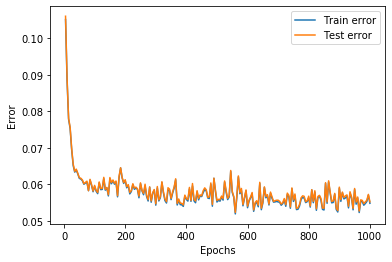

In [ ]:
plt.plot(count*5, error_train_co, label='Train error')
plt.plot(count*5, error_test_co, label='Test error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

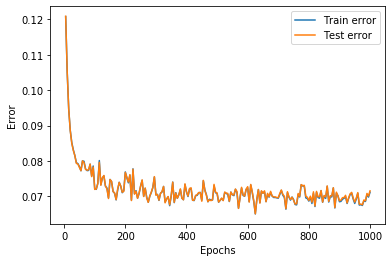

In [ ]:
plt.plot(count*5, error_train_et, label='Train error')
plt.plot(count*5, error_test_et, label='Test error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
epochs=610

In [ ]:
classifier.fit(X_train, y_train, batch_size = 1900, nb_epoch = epochs)
y_pred = classifier.predict(X_test)
for i in range(0,np.size(y_pred,0)):
    for j in range(0,np.size(y_pred,1)):
        if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
            y_pred[i,j]=-y1_mean[j]/y1_max[j]
error_test_co=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
error_test_et=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
RMSE=np.array([error_test_co, error_test_et])*y1_max

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0327 - acc: 0.7169
Epoch 2/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0207 - acc: 0.7848
Epoch 3/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0189 - acc: 0.7987
Epoch 4/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0177 - acc: 0.8098
Epoch 5/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0168 - acc: 0.8082
Epoch 6/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0159 - acc: 0.8082
Epoch 7/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0153 - acc: 0.8044
Epoch 8/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0146 - acc: 0.8000
Epoch 9/610
594225/594225 [==============================] - 2s 3us/step - loss: 0.0140 - acc: 0.7968
Epoch 10/610
594225/594225 [==============================] - 2s 3us/step - loss: 

In [ ]:
print("RMSE for CO prediction is",RMSE[0],"and Ethylene prediction is",RMSE[1],"respectively.")

RMSE for CO prediction is 16.34677841727218 and Ethylene prediction is 1.3343177532533983 respectively.


In [ ]:
y1_max

array([296.67,  20.  ])